# Loading the Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [42]:
import seaborn as sns

# Importing the Datasets

In [6]:
major = pd.read_csv('./degrees-that-pay-back.csv')    #by major (50)              -- starting, median, percentile salaries
ctype = pd.read_csv('./salaries-by-college-type.csv') #by uni (269) / school type -- starting, median, percentile salaries
region = pd.read_csv('./salaries-by-region.csv')       #by uni (320) / region      -- starting, median, percentile salaries

In [7]:
major.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [8]:
ctype.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [9]:
region.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


# Rename the Columns on the Major

In [10]:
major.columns = ['major','bgn_p50','mid_p50','delta_bgn_mid','mid_p10','mid_p25','mid_p75','mid_p90']
major.head()

,major,bgn_p50,mid_p50,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [11]:
type(major['bgn_p50'][1]) # Noticed that it is a string

str

# Converting to Numbers

In [12]:
dollar_cols = ['bgn_p50','mid_p50','mid_p10','mid_p25','mid_p75','mid_p90']

for x in dollar_cols:
    major[x] = major[x].str.replace("$","")
    major[x] = major[x].str.replace(",","")
    major[x] = pd.to_numeric(major[x])

major.head()

,major,bgn_p50,mid_p50,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


# Looking at the Converted Number as a Mean and Looking at the Dataset Again

In [13]:
major['bgn_p50'].mean()

44310.0

In [14]:
major.describe()

,bgn_p50,mid_p50,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44310.000000,74786.00000,69.274000,43408.000000,55988.000000,102138.000000,142766.000000
std,9360.866217,16088.40386,17.909908,12000.779567,13936.951911,20636.789914,27851.249267
min,34000.000000,52000.00000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,37050.000000,60825.00000,59.125000,34825.000000,44975.000000,83275.000000,124250.000000
50%,40850.000000,72000.00000,67.800000,39400.000000,52450.000000,99400.000000,145500.000000
75%,49875.000000,88750.00000,82.425000,49850.000000,63700.000000,118750.000000,161750.000000
max,74300.000000,107000.00000,103.500000,71900.000000,87300.000000,145000.000000,210000.000000


In [15]:
major.head()

,major,bgn_p50,mid_p50,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


# Rearranging From Top to Bottom

In [16]:
major.sort_values(by = 'bgn_p50', ascending = False, inplace=True)
major.head()

,major,bgn_p50,mid_p50,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
43,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
38,Mechanical Engineering,57900.0,93600.0,61.7,63700.0,76200.0,120000.0,163000.0


# Reset Index

In [18]:
major = major.reset_index()
major.head(10)

,index,major,bgn_p50,mid_p50,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
0,43,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0
1,8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
2,12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
3,19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
4,38,Mechanical Engineering,57900.0,93600.0,61.7,63700.0,76200.0,120000.0,163000.0
5,1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
6,30,Industrial Engineering,57700.0,94700.0,64.1,57100.0,72300.0,132000.0,173000.0
7,13,Computer Science,55900.0,95500.0,70.8,56000.0,74900.0,122000.0,154000.0
8,40,Nursing,54200.0,67000.0,23.6,47600.0,56400.0,80900.0,98300.0
9,10,Civil Engineering,53900.0,90500.0,67.9,63400.0,75100.0,115000.0,148000.0


# Checking for NA Values

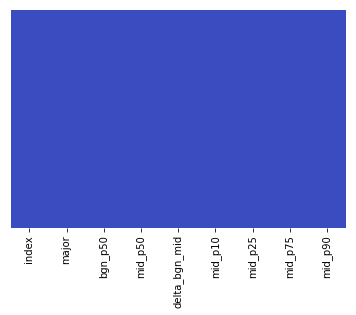

In [19]:
sns.heatmap(major.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

# Initial Graph

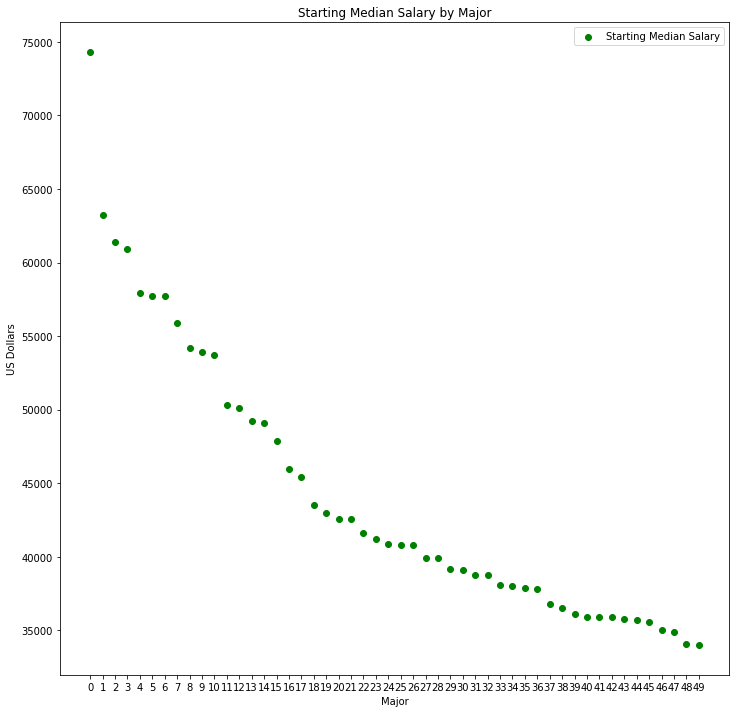

In [34]:
fig = plt.figure(figsize=(12,12))
x = major.index
y = major['bgn_p50']
labels = major.index

plt.scatter(x,y, color='green', label = 'Starting Median Salary')
plt.xticks(x, labels) 

plt.xlabel('Major')
plt.ylabel('US Dollars')
plt.title('Starting Median Salary by Major')
plt.legend()
plt.show()

# Adding the Major Names

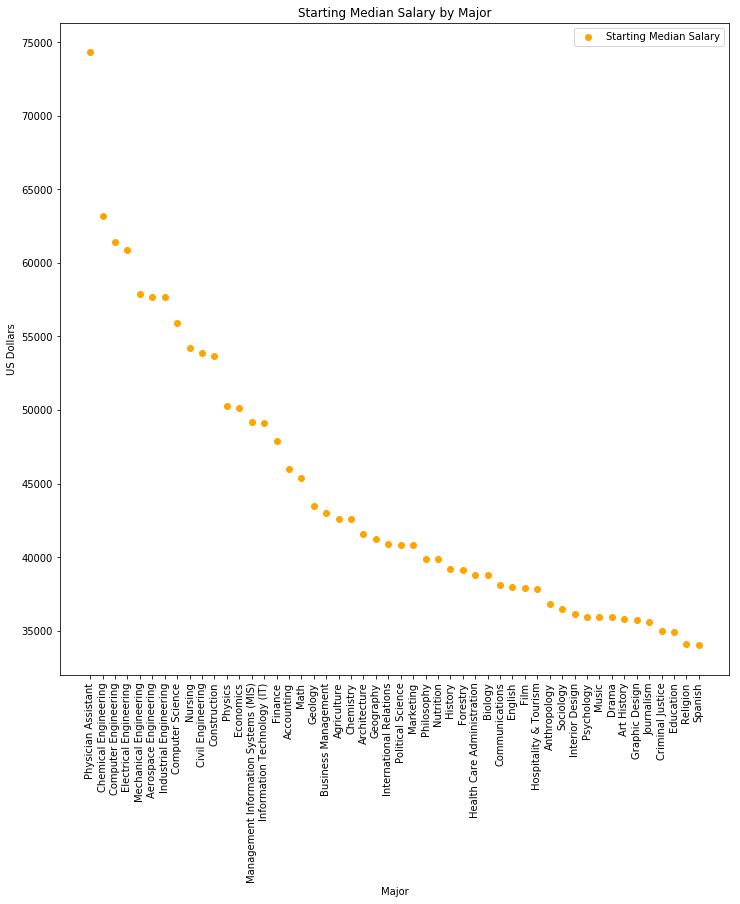

In [33]:
fig = plt.figure(figsize=(12,12))
x = major.index
y = major['bgn_p50']
labels = major['major']
#labels = df1.index

plt.scatter(x,y, color='orange', label = 'Starting Median Salary')
plt.xticks(x, labels, rotation = 'vertical') #rotation = 'vertical'

plt.xlabel('Major')
plt.ylabel('US Dollars')
plt.title('Starting Median Salary by Major')
plt.legend()
plt.show()

# Inverted Axes

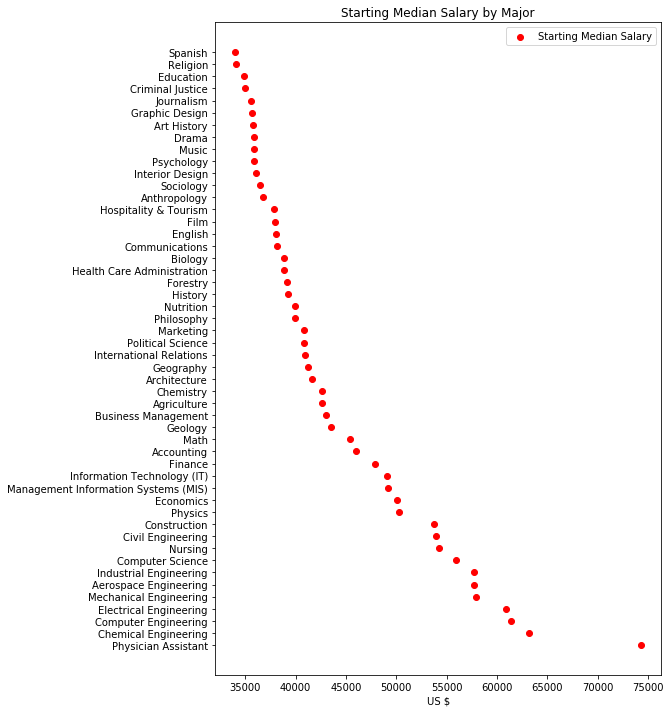

In [32]:
fig = plt.figure(figsize=(8,12))
x = major['bgn_p50'] #switch x and y labels
y = major.index
labels = major['major']
#labels = df1.index

plt.scatter(x, y, color='red', label = 'Starting Median Salary') 
plt.yticks(y, labels)

plt.xlabel('US $')
plt.ylabel('') #hide label
plt.title('Starting Median Salary by Major')
plt.legend()
plt.show()

# High to Low Arrangement

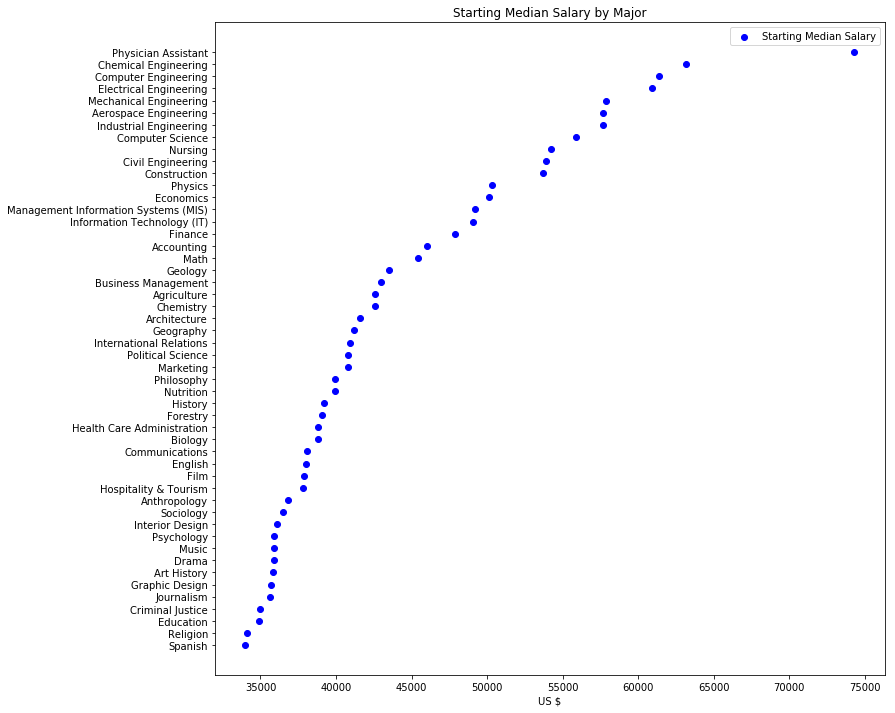

In [31]:
fig = plt.figure(figsize=(12,12))
x = major['bgn_p50']
y = len(major.index) - major.index #swap high and low
labels = major['major']

plt.scatter(x, y, color='blue', label = 'Starting Median Salary')
plt.yticks(y, labels)

plt.xlabel('US $')
plt.ylabel('')
plt.title('Starting Median Salary by Major')
plt.legend()
plt.show()

# Salary by Median Major

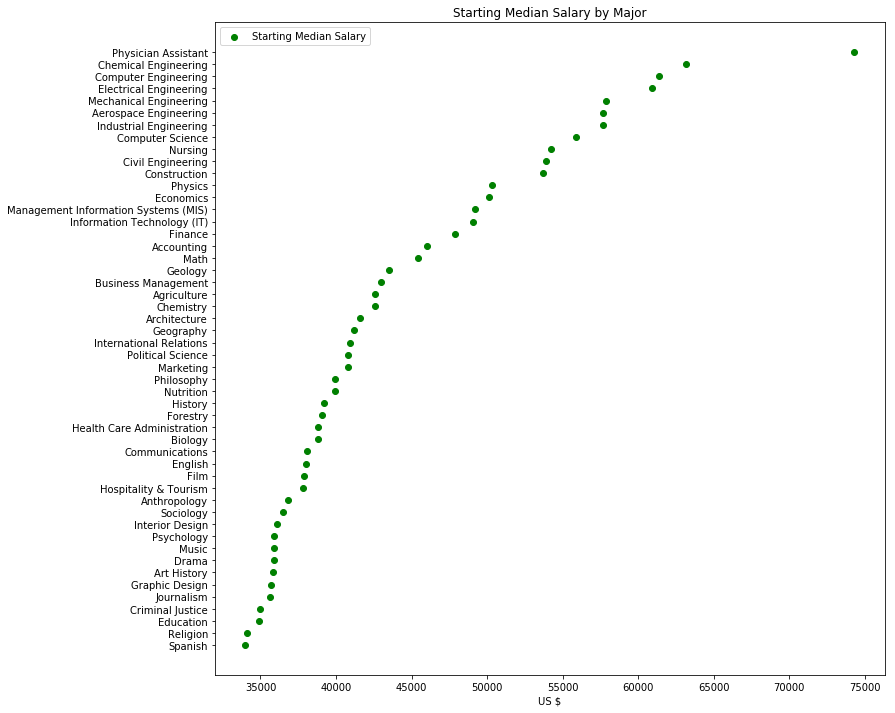

In [30]:
fig = plt.figure(figsize=(12,12))

x = major['bgn_p50']
y = len(major.index) - major.index
labels = major['major']

plt.scatter(x, y, color='g', label = 'Starting Median Salary')
plt.yticks(y, labels)

plt.xlabel('US $')
plt.ylabel('')
plt.title('Starting Median Salary by Major')
plt.legend(loc=2) #move the legend
plt.show()

# Differences with the Median Salary

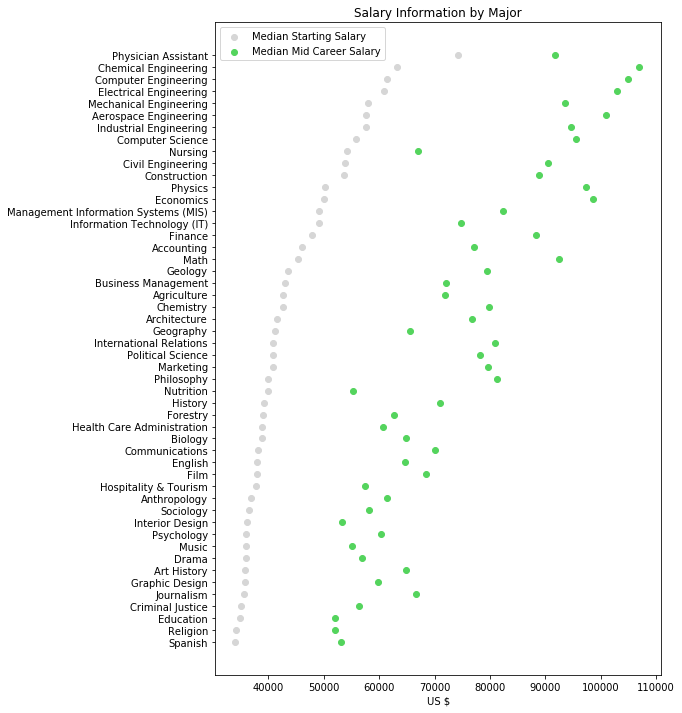

In [36]:
fig = plt.figure(figsize=(8,12))

x = major['bgn_p50']
y = len(major.index) - major.index
labels = major['major']

plt.scatter(x, y, color='#d6d6d6', label = 'Median Starting Salary')
plt.yticks(y, labels)

x3 = major['mid_p50']
plt.scatter(x3, y, color='#54d45d', label = 'Median Mid Career Salary')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Salary Information by Major')
plt.legend(loc=2) #move the legend
plt.show()

# Looking at it by College Type

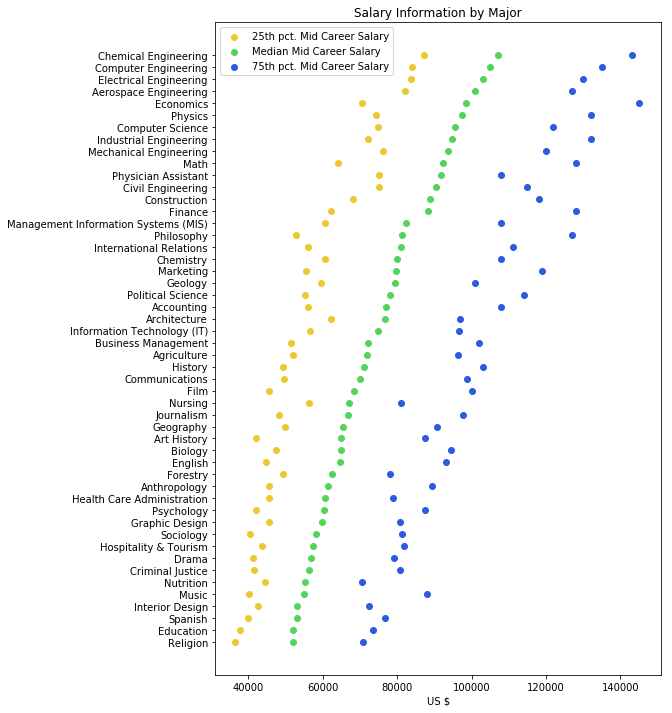

In [37]:
ctype = major.sort_values(by = 'mid_p50', ascending = False)
ctype = ctype.reset_index()

fig = plt.figure(figsize=(8,12))

x = ctype['bgn_p50']
y = len(ctype.index) - ctype.index
labels = ctype['major']

#plt.scatter(x, y, color='b', label = 'Median Starting Salary')
plt.yticks(y, labels)

x2 = ctype['mid_p25']
plt.scatter(x2, y, color='#ecc833', label = '25th pct. Mid Career Salary')

x3 = ctype['mid_p50']
plt.scatter(x3, y, color='#54d45d', label = 'Median Mid Career Salary')

x4 = ctype['mid_p75']
plt.scatter(x4, y, color='#2b5bde', label = '75th pct. Mid Career Salary')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Salary Information by Major')
plt.legend(loc=2) #move the legend
plt.show()

# Adding All the Percentiles of the Salaries

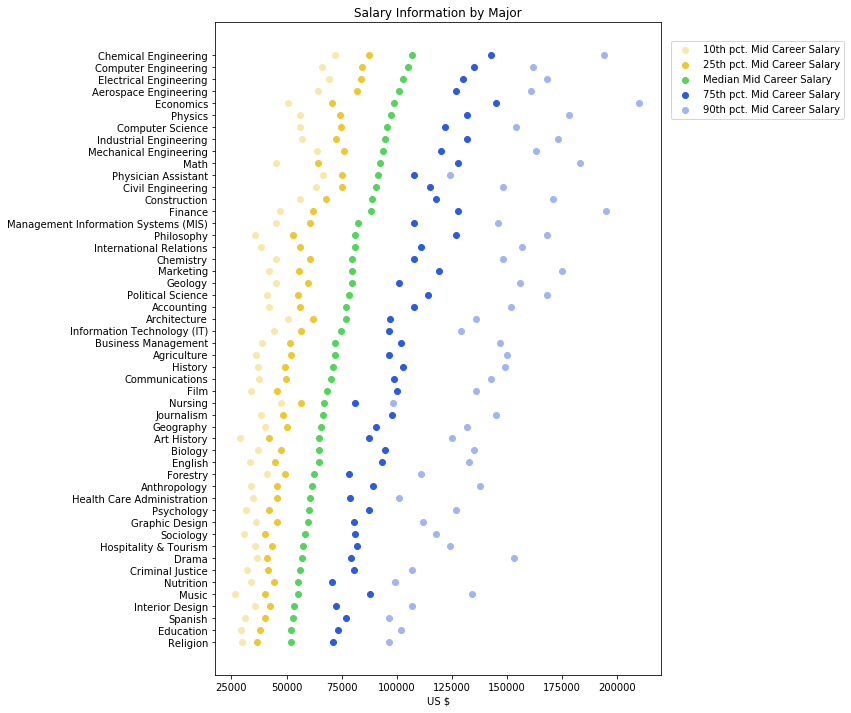

In [39]:
ctype = major.sort_values(by = 'mid_p50', ascending = False)
ctype = ctype.reset_index()

fig = plt.figure(figsize=(8,12))

x = ctype['bgn_p50']
y = len(ctype.index) - ctype.index + 1
labels = ctype['major']

#plt.scatter(x, y, color='b', label = 'Median Starting Salary')
plt.yticks(y, labels)

x1 = ctype['mid_p10']
plt.scatter(x1, y, color='#f7e9ad', label = '10th pct. Mid Career Salary')

x2 = ctype['mid_p25']
plt.scatter(x2, y, color='#ecc833', label = '25th pct. Mid Career Salary')

x3 = ctype['mid_p50']
plt.scatter(x3, y, color='#54d45d', label = 'Median Mid Career Salary')

x4 = ctype['mid_p75']
plt.scatter(x4, y, color='#2b5bde', label = '75th pct. Mid Career Salary')

x5 = ctype['mid_p90']
plt.scatter(x5, y, color='#a1b6f0', label = '90th pct. Mid Career Salary')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Salary Information by Major')
plt.legend(loc='upper right', bbox_to_anchor=(1.42,.98)) #move the legend

plt.show()